In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/ai2/Data_AI_k20

/content/drive/.shortcut-targets-by-id/1nMZkJtIkGK4puvqF_kUXAhOn-ehS3fpf/Data_AI_k20


In [4]:
ls

Ai/    face_model.h5  Hoang/  Nguyen/  Phuc/  Tanh/   Thuong/
Dang/  Han/           LamVu/  phi/     Tan/   Thoai/


In [5]:
import cv2
from pathlib import Path
flower_dataset_folder = '/content/drive/MyDrive/ai2/Data_AI_k20'
classnames = []
for path in Path(flower_dataset_folder).iterdir():
    if path.is_dir():
        classnames.append(str(path).split('/')[-1])
print(classnames)
X = []
y = []
for i in range(len(classnames)):
  print(classnames[i])
  images = list(Path(classnames[i]).glob('*'))
  for image in range(int(0.4*len(images))):
    img = cv2.imread(str(images[image]))
    img = cv2.resize(img, (128, 128))
    img = img.astype('float32')
    img = img/255
    X.append(img)
    y.append(i)

['Tan', 'Thoai', 'Ai', 'Thuong', 'Phuc', 'Tanh', 'Hoang', 'phi', 'LamVu', 'Han', 'Nguyen', 'Dang']
Tan
Thoai
Ai
Thuong
Phuc
Tanh
Hoang
phi
LamVu
Han
Nguyen
Dang


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2)

In [7]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(368, 128, 128, 3)
(93, 128, 128, 3)
(368, 12)
(93, 12)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


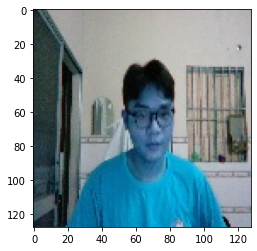

In [9]:
plt.imshow(X_train[8])
print(y_train[8])

In [10]:
from keras.models import Sequential, Model
from keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = X_train[0].shape))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(y_train.shape[1], activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 96)       0

In [11]:
import keras
model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=2)

Epoch 1/100
3/3 - 10s - loss: 2.2038 - accuracy: 0.2582 - 10s/epoch - 3s/step
Epoch 2/100
3/3 - 0s - loss: 1.8110 - accuracy: 0.3750 - 204ms/epoch - 68ms/step
Epoch 3/100
3/3 - 0s - loss: 1.2223 - accuracy: 0.5924 - 201ms/epoch - 67ms/step
Epoch 4/100
3/3 - 0s - loss: 0.5626 - accuracy: 0.8804 - 203ms/epoch - 68ms/step
Epoch 5/100
3/3 - 0s - loss: 0.2684 - accuracy: 0.8886 - 200ms/epoch - 67ms/step
Epoch 6/100
3/3 - 0s - loss: 0.1776 - accuracy: 0.9457 - 201ms/epoch - 67ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0409 - accuracy: 0.9891 - 201ms/epoch - 67ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0326 - accuracy: 0.9946 - 205ms/epoch - 68ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0156 - accuracy: 0.9946 - 201ms/epoch - 67ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0058 - accuracy: 1.0000 - 202ms/epoch - 67ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0023 - accuracy: 1.0000 - 201ms/epoch - 67ms/step
Epoch 12/100
3/3 - 0s - loss: 4.8731e-04 - accuracy: 1.0000 - 199ms/epoch - 66ms/step
Epoch 13/100
3/3 - 0s - 

In [13]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 1s 83ms/step - loss: 3.0123e-07 - accuracy: 1.0000


[3.0122643579488795e-07, 1.0]

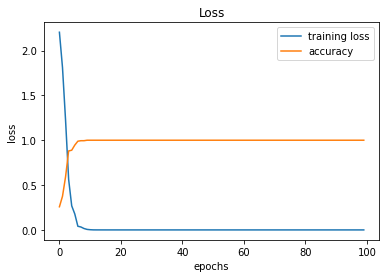

In [14]:
# plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [15]:
n = 1

(128, 128, 3)
1/1 [==============================] - 0s 161ms/step
Pred:  phi
True label:  phi


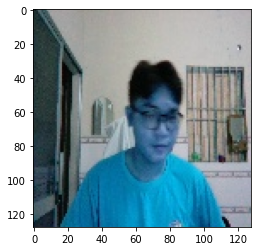

In [16]:
# n = 0
n+=1
print(X_test[n].shape)
plt.imshow(X_test[n])
pred = model.predict(X_test[n].reshape(1, 128, 128, 3))
print('Pred: ', classnames[pred.argmax()])
print('True label: ', classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 15ms/step
Pred:  Han
True label:  Han


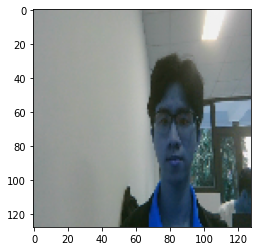

In [17]:
n+=1
print(X_test[n].shape)
plt.imshow(X_test[n])
pred = model.predict(X_test[n].reshape(1, 128, 128, 3))
print('Pred: ', classnames[pred.argmax()])
print('True label: ', classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 15ms/step
Pred:  Thoai
True label:  Thoai


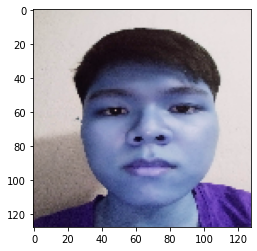

In [18]:
n+=1
print(X_test[n].shape)
plt.imshow(X_test[n])
pred = model.predict(X_test[n].reshape(1, 128, 128, 3))
print('Pred: ', classnames[pred.argmax()])
print('True label: ', classnames[y_test[n].argmax()])